In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
#크롬 드라이버를 실행
driver = webdriver.Chrome("chromedriver.exe")
#백종원 요리비책 페이지로 이동
driver.get('https://www.youtube.com/channel/UCyn-K7rZLXjGl7VXGweIlcA/videos')

In [4]:
import time
#한번 스크롤 하고 잠깐 멈출 시간을 저장한 변수 0.5초 멈출것임
SCROLL_PAUSE_TIME=0.5
#화면의 본문인 body태그를 선택해서 body에 대입
body = driver.find_element_by_tag_name("body")

#break 가 실행될때(스크롤 전의 화면크기와 스크롤 후의 화면 크기가 같음) 까지 반복
while True:
    #현재 화면의 길이를 리턴 받아서 last_height에 대입
    last_height=driver.execute_script("return document.documentElement.scrollHeight")
    print("======================================================")
    #현재 화면의 크기 출력
    print("last_height:", last_height)
    
    #0~9까지 10번 반복해서 실행
    for i in range(10):
        #body본문에 END키를 입력(화면이 끝까지 스크롤 되고 화면이 길어짐)
        body.send_keys(Keys.END)
        #SCROLL_PAUSE_TIME에 저장된시간 0.5초 멈춤
        time.sleep(SCROLL_PAUSE_TIME)    
    #스크롤 후의 화면의 길이를 리턴 받아서 new_height에 대입
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    #스크롤 후의 화면의 길이를 출력
    print("new_height:", new_height)
    
    #스크롤 후의 화면의 길이 (new_height) 스크롤 전의 화면의 길이 (last_height)가 같다면
    if new_height == last_height:
        break #반복 종료
    

last_height: 2358
new_height: 10868
last_height: 10868
new_height: 12378
last_height: 12378
new_height: 12378


In [6]:
#Youtube 페이지 소스를 page에 대입
page = driver.page_source

In [7]:
from bs4 import BeautifulSoup
#page에 저장된 태그를 BeautifulSoup을 이용해서 정리해서 리턴
soup = BeautifulSoup(page,'lxml')

In [8]:
#div태그중 id속성이 dismissable 인 객체 조회
all_videos = soup.find_all(id="dismissable")

In [9]:
title_list = []
#all_videos에서 video 하나를 리턴
for video in all_videos:
    #video에서 id가 video-title 속성을 갖는 객체 조회 (제목)
    title = video.find(id="video-title")
    #title.text.strip() 공백을 제거하고 len() 글자수가 0보다 큰 제목이면
    if len(title.text.strip())>0:
       #리스트에 추가
       title_list.append(title.text)

In [10]:
video_time_list=[]
#all_videos에 저장된 video정보를 하나를 video에 대입하고 반복
for video in all_videos:
    #비디오 타임을 찾음
    #span태그 이면서 class속성이 'style-scope ytd-thumbnail-overlay-time-status-renderer' 인 객체 조회
    video_time = video.find('span',{"class":'style-scope ytd-thumbnail-overlay-time-status-renderer'})
    #비디오 타입의 공백을 제거  video_time.text.strip()
    #하고 video_time_list 에 추가 video_time_list.append(video_time.text.strip())
    video_time_list.append(video_time.text.strip())

In [11]:
video_time_seperate_list=[]
#비디오 타임중 하나를 time에 대입
for time in video_time_list:
    #time을 :를 기준으로 분리
    time_list=time.split(":")
    #길이가 3미만
    if len(time_list)<3:
        #분 초를 계산해서 video_time_seperate_list에 추가
        video_time_seperate_list.append(int(time_list[0])*60+int(time_list[1]))
    else:
        #시 분 초를 계산해서 video_time_seperate에추가
        video_time_seperate_list.append(int(time_list[0])*3600+int(time_list[1])*60+int(time_list[2]))

In [12]:
view_num_list=[]
import re
#조회수를 포함하는 문자열을 검색하기 위한 객체 view_num_regexp생성
view_num_regexp = re.compile(r'조회수')
#all_videos에 저장된 video정보를 하나를 video에 대입하고 반복
for video in all_videos:
    #비디오에 포함된 조회수를 리턴
    #span 태그 이면서 class속성이 style-scope ytd-grid-video-renderer 인 객체 조회
    view_num = video.find('span',{"class":'style-scope ytd-grid-video-renderer'})
    #view_num의 문자열(view_num.text) 에 '조회수' 문자열이 포함되 있으면 true
    #if view_num_regexp.search(view_num.text):
    if view_num_regexp.search(view_num.text):
        #view_num_list에 view_num.text(조회수 문자열)을 추가 :view_num_list.append(view_num.text)
        view_num_list.append(view_num.text)

In [13]:
#조회수 를 숫자로 변환해서 저장할 리스트
view_number_type_list=[]
#view_num_list에서 조회수 하나를 view에 대입
for view in view_num_list:
    #"조회수" 문자열 삭제
    view=view.replace("조회수 ","")
    #view의 마지막 2번째 문자열까지(숫자가 저장) view[:-2] 을 실수로 변환 float()
    #해서 num에 대입
    num=float(view[:-2])
    #조회수의 마지막 2번째 부터 마지막 문자열 까지 (만회, 천회) danwee에 대입
    danwee=view[-2:]
    #단위가 "만회"이면
    if danwee=="만회":
        #조회수 숫자에 10000 곱함
        view_number_type_list.append(int(num*10000))
    else:
        #아니면 조회수 숫자에 1000 곱함
        view_number_type_list.append(int(num*1000))

In [14]:
driver.quit()

In [15]:
#데이터프레임 생성을 위한 라이브러리 호출
import pandas as pd 

In [16]:
#데이터프레임 생성

df_dic = {
    "a01" : ["가", "나", "다"],
    "b01" : [100, 200, 300]
}

pd.DataFrame(df_dic)

,a01,b01
0,가,100
1,나,200
2,다,300


In [17]:
#유튜브 크롤링 > 데이터프레임화

dict_youtube = {
    "title":title_list, 
    "video_time":video_time_seperate_list,
    "view_num": view_number_type_list
}

youtube = pd.DataFrame(dict_youtube)
youtube.head() #상위 5개 항목 출력

,title,video_time,view_num
0,김치전을 바삭바삭하게!,663,5400
1,집에 손님 올 때는 이 메뉴를 해보세요. Make This Dish When You...,821,340000
2,식당에서 먹는 닭볶음탕의 비법은 바로~ What is the secret of Da...,1124,560000
3,장 보러 '서울중앙시장'에 다녀왔습니다! I Went to Seoul Central...,393,230000
4,얼큰하고 매콤하게~ 밥도둑 두부조림! Hot and spicy dubujorim!,520,560000


In [18]:
#데이터프레임에서 특정 칸만 출력
youtube["title"] #칸 이름

0                                           김치전을 바삭바삭하게!
1      집에 손님 올 때는 이 메뉴를 해보세요. Make This Dish When You...
2      식당에서 먹는 닭볶음탕의 비법은 바로~ What is the secret of Da...
3      장 보러 '서울중앙시장'에 다녀왔습니다! I Went to Seoul Central...
4          얼큰하고 매콤하게~ 밥도둑 두부조림! Hot and spicy dubujorim!
                             ...                        
200                  [안녕하세요 백종원입니다-5] 장사이야기! 제가 정답이 아닙니다
201         [안녕하세요 백종원입니다-4] 제대로 된 한식 레시피, 이렇게 알리고 싶었습니다
202                  [안녕하세요 백종원입니다-3] 제 전문적 지식은 한참 아래입니다
203                  [안녕하세요 백종원입니다-2] 요리에 자신감을 드리고 싶었습니다
204               [안녕하세요 백종원입니다-1] 제가 유튜브를 시작하게 된 계기는요..
Name: title, Length: 205, dtype: object

In [19]:
youtube["title"][0] #title의 첫 번째 데이터만 출력

'김치전을 바삭바삭하게!'

In [20]:
from konlpy.tag import Twitter

In [21]:
twitter = Twitter() #문장을 단어 단위로 나눈고, 단어/품사를 리턴하는 객체

C:\ai\python\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [22]:
tagged = twitter.pos(youtube["title"][0], stem = True) #동사를 기본형으로 변환

print(len(tagged)) #리스트의 길이 반환
print()

for i in range(0, len(tagged)):
    if (tagged[i][1] == "Noun"):
        print(tagged[i][0])

4

김치전


In [23]:
#그래프를 그리기 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name) #그래프의 폰트로 설정(family: 글자체)

font_name

'Malgun Gothic'

C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


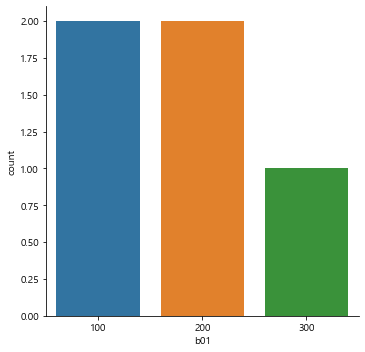

In [25]:
#예제

df_dic = {
    "a01" : ["가", "나", "다", "라", "마"],
    "b01" : [100, 200, 100, 200, 300]
} #딕셔너리 생성

df = pd.DataFrame(df_dic) #데이터프레임화

#"b01"의 각 데이터의 빈도수를 그래프화 
#sns.factorplot()
#kind(빈도수), size(그래프 크기)

graph = sns.factorplot("b01", data = df, kind = "count", size = 5)
graph.set_xlabels()

In [26]:
#데이터프레임에 데이터 추가
df.at[5, "a01"] = "바"
df.at[6, "b01"] = 300

df

,a01,b01
0,가,100.0
1,나,200.0
2,다,100.0
3,라,200.0
4,마,300.0
5,바,NaN
6,NaN,300.0


In [27]:
#데이터프레임의 결측치 제거
df = df.dropna(subset = ["b01"])
df

,a01,b01
0,가,100.0
1,나,200.0
2,다,100.0
3,라,200.0
4,마,300.0
6,NaN,300.0


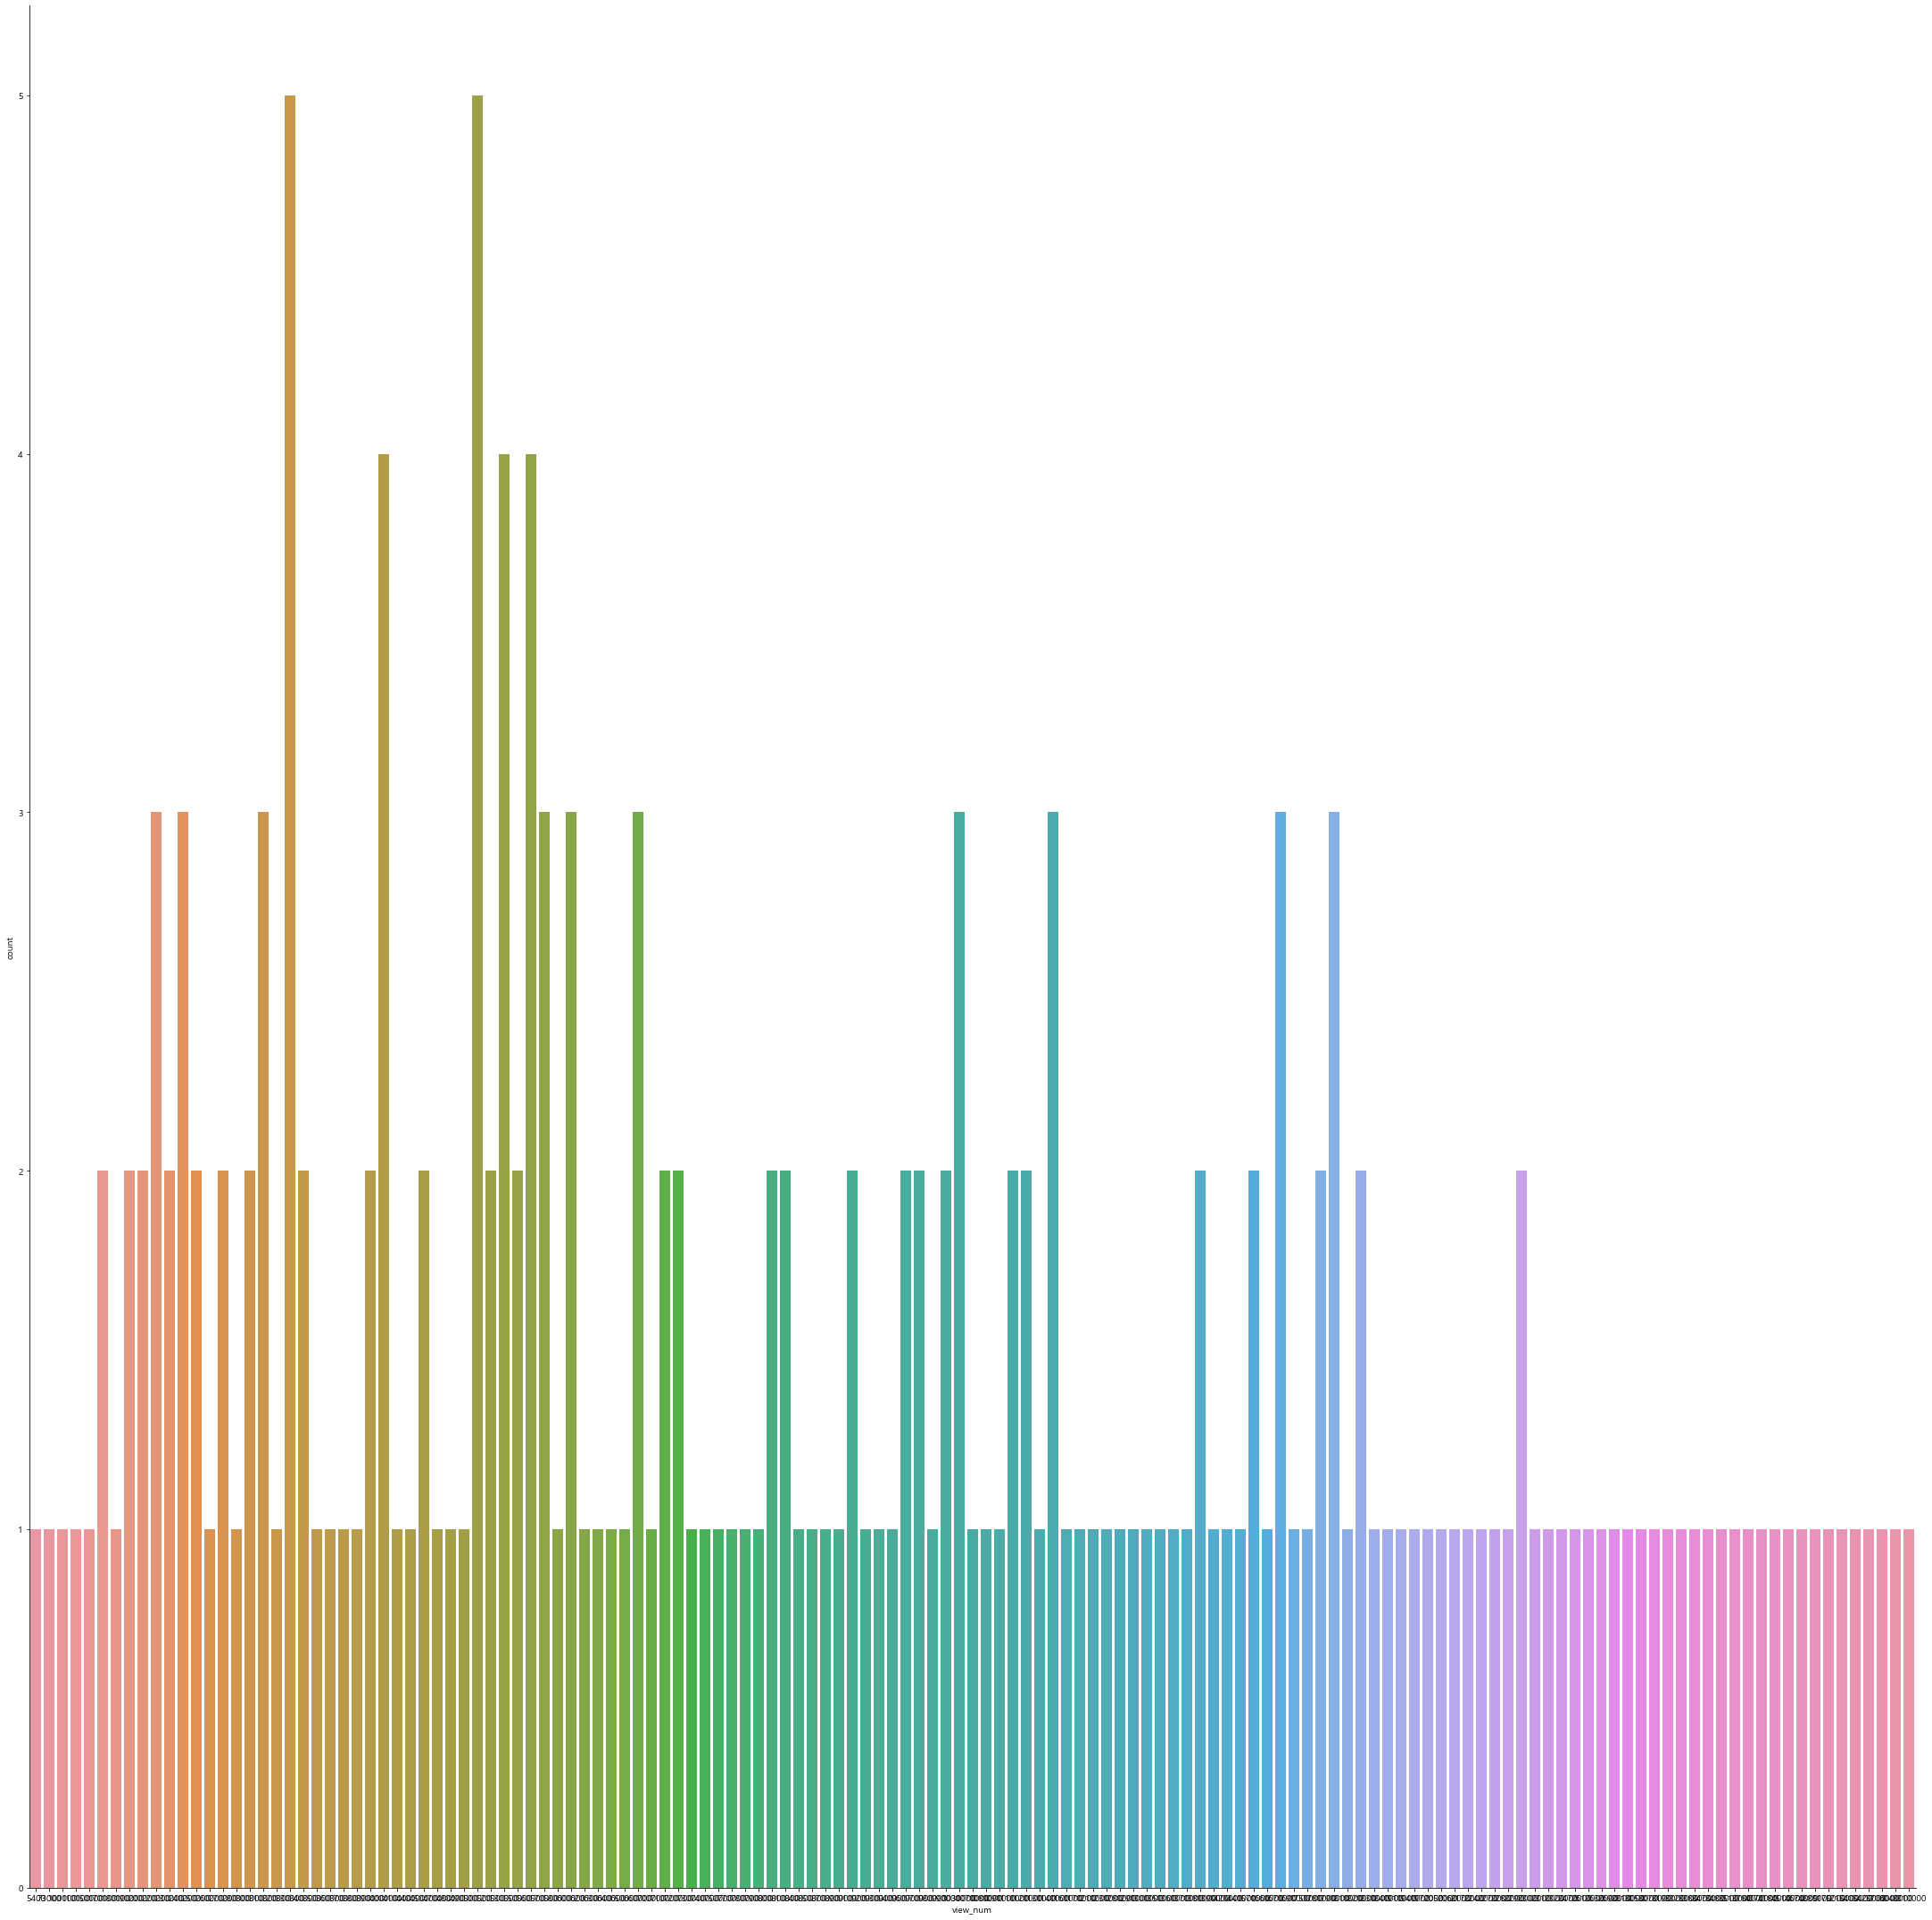

In [28]:
#유튜브 조회수 시각화(그래프 생성)
g = sns.factorplot("view_num", data = youtube, kind = "count", size = 30)
g.set_xlabels()

In [29]:
youtube = youtube.dropna(subset = ["view_num"]) #조회수가 null인 줄 삭제
youtube["view_num2"] = 0 #view_num2 컬럼을 생성, 0으로 초기화

In [30]:
for index in range(len(youtube)):
    #youtube "view_num" 컬럼의 index번째 데이터를 view_num에 대입
    view_num = youtube["view_num"][index] 
    if(view_num < 500000):
        youtube["view_num2"][index] = 0 #bad
    elif(view_num < 1000000):
        youtube["view_num2"][index] = 1 #normal
    else:
        youtube["view_num2"][index] = 2 #good

youtube

C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,title,video_time,view_num,view_num2
0,김치전을 바삭바삭하게!,663,5400,0
1,집에 손님 올 때는 이 메뉴를 해보세요. Make This Dish When You...,821,340000,0
2,식당에서 먹는 닭볶음탕의 비법은 바로~ What is the secret of Da...,1124,560000,1
3,장 보러 '서울중앙시장'에 다녀왔습니다! I Went to Seoul Central...,393,230000,0
4,얼큰하고 매콤하게~ 밥도둑 두부조림! Hot and spicy dubujorim!,520,560000,1
...,...,...,...,...
200,[안녕하세요 백종원입니다-5] 장사이야기! 제가 정답이 아닙니다,136,330000,0
201,"[안녕하세요 백종원입니다-4] 제대로 된 한식 레시피, 이렇게 알리고 싶었습니다",279,520000,1
202,[안녕하세요 백종원입니다-3] 제 전문적 지식은 한참 아래입니다,91,500000,1
203,[안녕하세요 백종원입니다-2] 요리에 자신감을 드리고 싶었습니다,95,650000,1


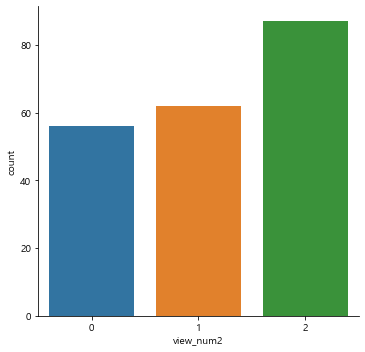

In [31]:
g = sns.factorplot("view_num2", data = youtube, kind = "count", size = 5)
g.set_xlabels()

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(youtube["title"], youtube["view_num2"])

In [34]:
#명사와 형용사만을 리턴하는 함수
def getNounAndAdject(text): 
    stems = []
    tagged = twitter.pos(text, stem = True)
    for i in range(0, len(tagged)):
        if(tagged[i][1] == "Noun" or tagged[i][1] == "Adjective"):
            stems.append(tagged[i][0])
    return stems

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer(min_df = 2, tokenizer = getNounAndAdject)

X_train_vector = vectorizer.fit_transform(X_train) #학습데이터의 tfidf
X_test_vector = vectorizer.transform(X_test) #테스트데이터의 tfidf

In [37]:
df_tfidf1 = pd.DataFrame(X_train_vector.A, columns = vectorizer.get_feature_names()) #X_train_vector를 데이터 프레임으로 변환

In [38]:
df_tfidf2 = pd.DataFrame(X_test_vector.A, columns = vectorizer.get_feature_names()) #X_test_vector를 데이터 프레임으로 변환

In [40]:
#모델 성능 평가
from sklearn.metrics import classification_report, confusion_matrix

#Decision Tree 알고리즘 서브 패키지
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

#IPython 내에 정보를 보여주는 도구용 공용 API
#Image : raw 데이터가 있는 PNG, JPEG 이미지 객체를 만드는 모듈
from IPython.display import Image

#그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
import pydotplus

#운영체제와 상호작용하기 위한 기본적인 기능
import os

In [41]:
df_clf = DecisionTreeClassifier()
df_clf = df_clf.fit(X_train_vector, y_train)
df_prediction = df_clf.predict(X_test_vector)

In [42]:
confusion_matrix(y_test, df_prediction) #모델 성능 평가

array([[15,  1,  2],
       [ 5,  1,  6],
       [ 5,  5, 12]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, df_prediction)
print("정확도", accuracy)

정확도 0.5384615384615384


In [44]:
from sklearn.tree import export_graphviz

export_graphviz(
    df_clf,
    out_file = "youtube_tree.dot",
    feature_names = df_tfidf1.columns,
    class_names = ["bad", "normal", "good"],
    rounded = True,
    filled = True
)

In [45]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

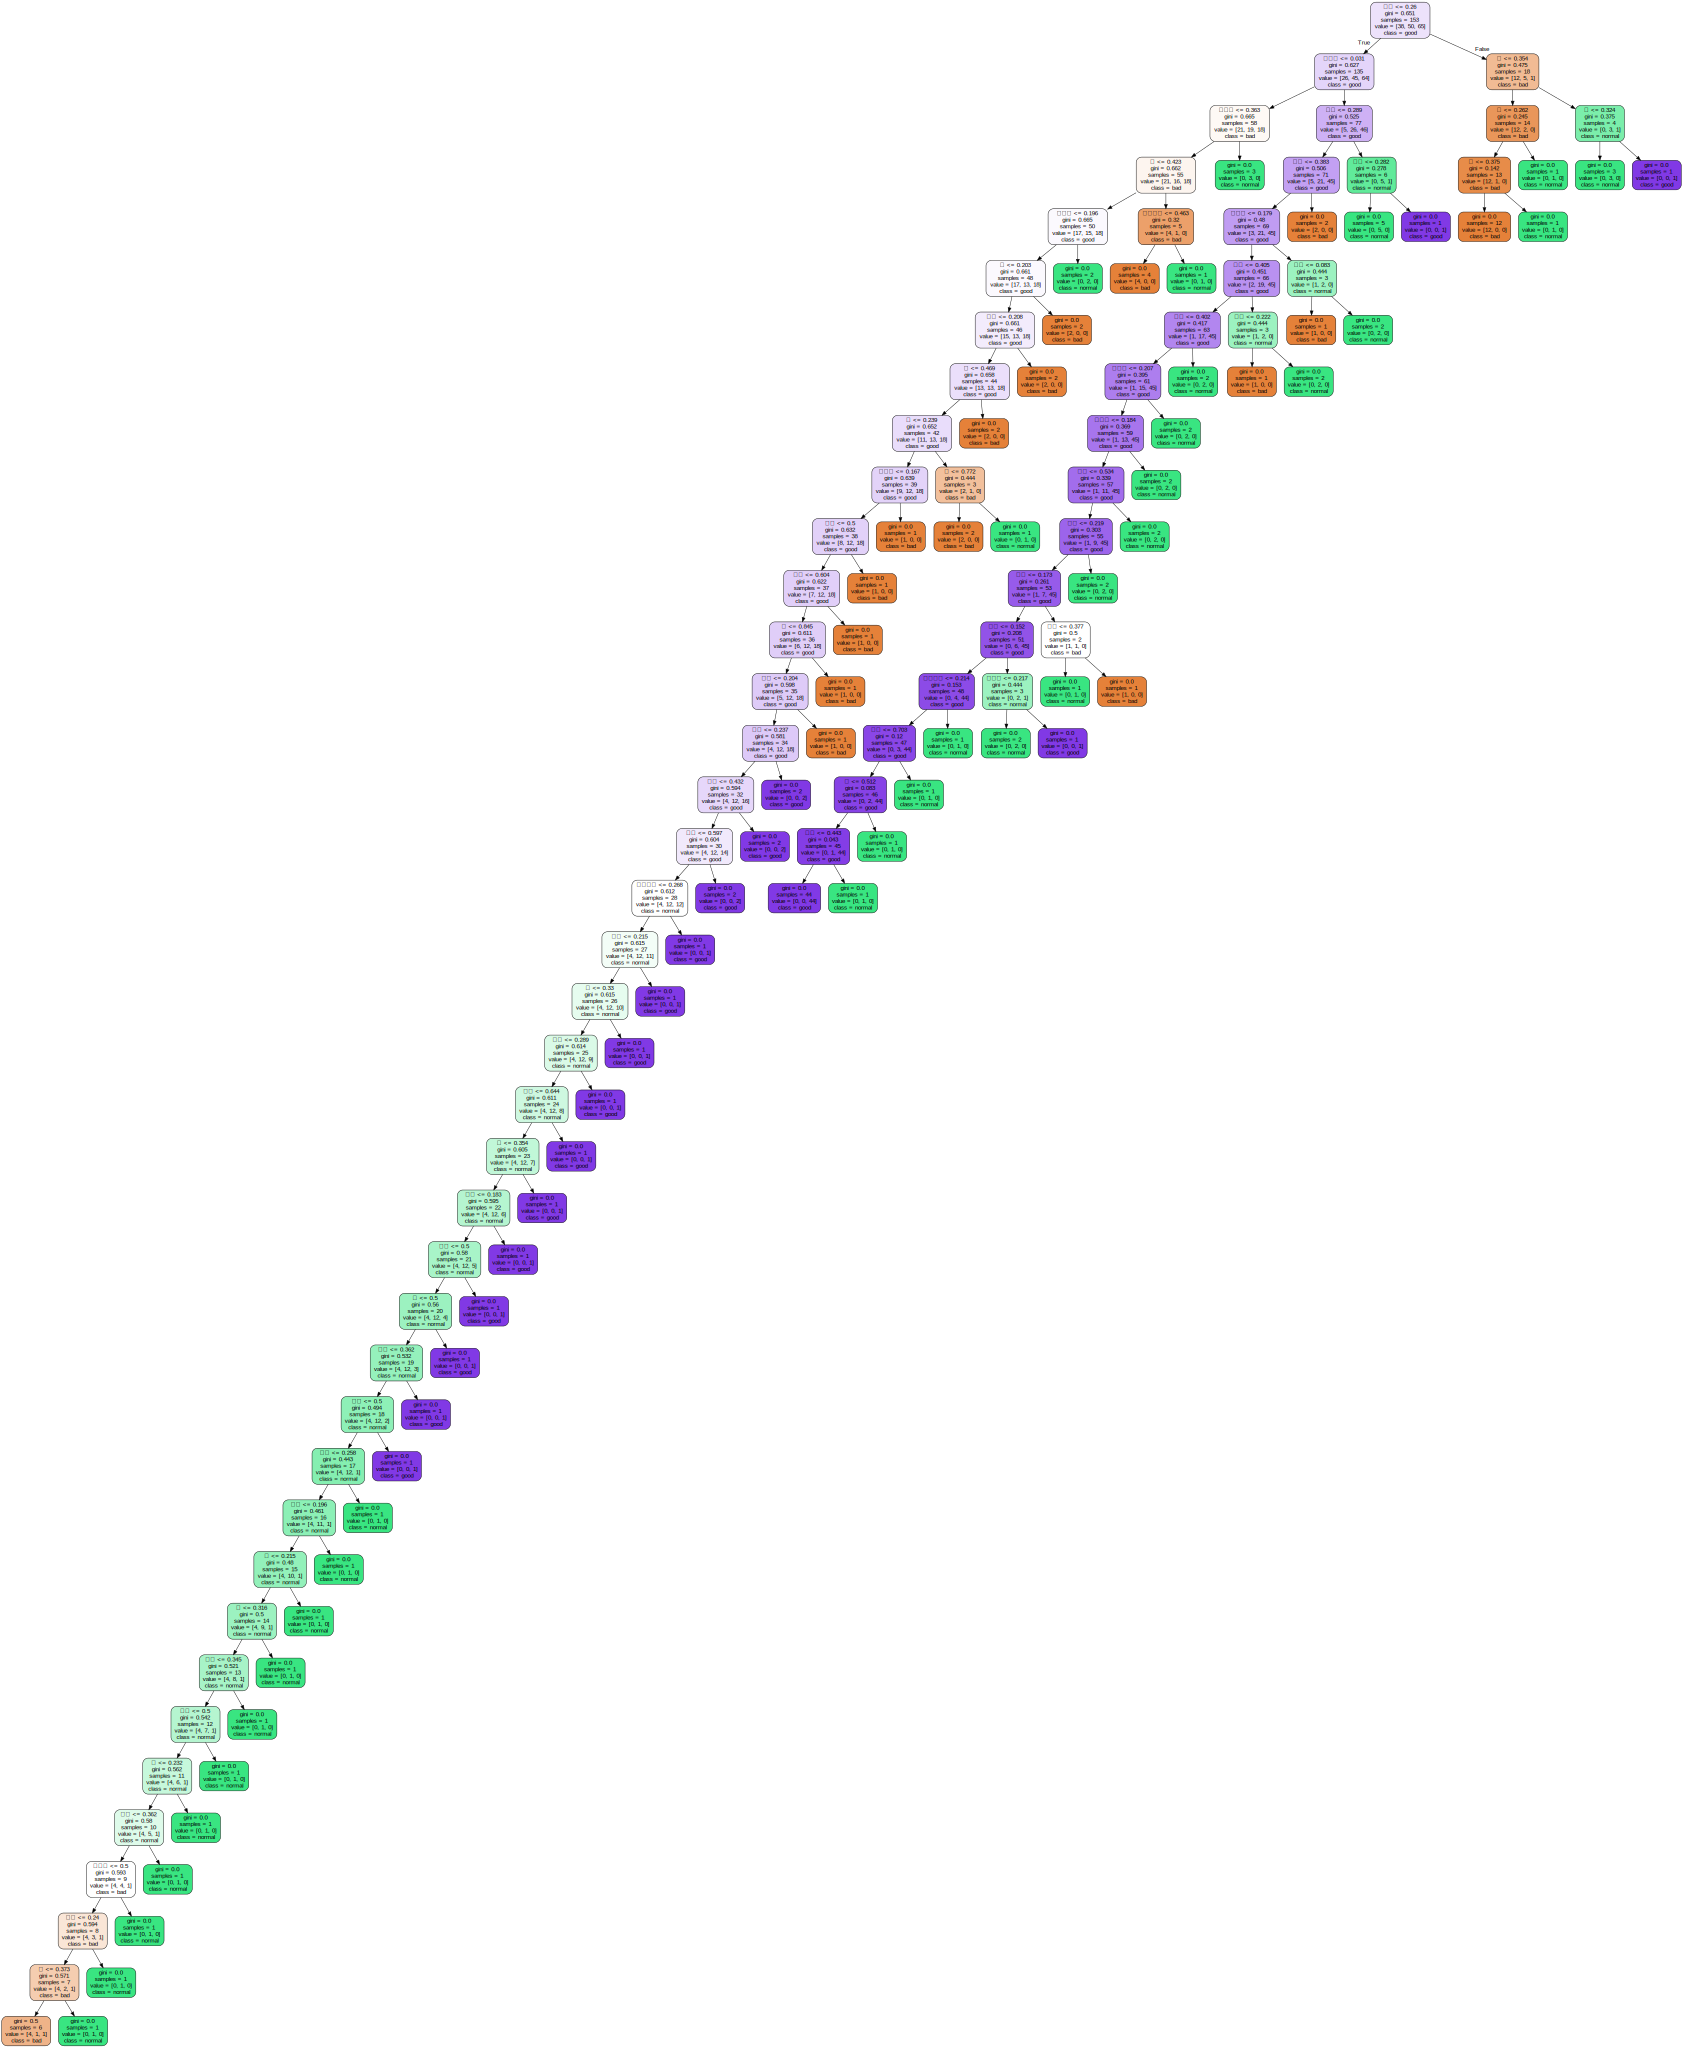

In [46]:
import graphviz

with open("youtube_tree.dot", encoding = "UTF-8") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph, encoding = "UTF-8")

dot